In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [184]:
def lyapunov_exponent(fn, deriv, val, num_iterates=10**6):
    trajectory = iterate_map(fn, val, num_iterates)
    return np.sum(np.log(np.abs(deriv(trajectory)))) / trajectory.size

def lyapunov_number(fn, deriv, val, num_iterates=10**6):
    return np.exp(lyapunov_exponent(fn, deriv, val, num_iterates))

def iterate_map(f, x_0, n):
    # extended for multi-dim case
#     trajectory = [x_0] * (n+1)
    trajectory = np.stack([x_0] * (n+1), axis=0)
    trajectory[0] = x_0
    for i in range(1, n + 1):
        # should probably just pass in vector instead of unpacking
        trajectory[i] = f(trajectory[i-1]) 
    
    return trajectory

In [185]:
def problem_1a():
    time1_map = lambda x: np.exp(3) * x
    time1_deriv = lambda x: np.ones(x.shape) * np.exp(3)
    
    return lyapunov_exponent(time1_map, time1_deriv, 1/2, 10**2)

def problem_1b():
    time1_map = lambda x: np.e / ((1 / x) - 1 + np.e)
    time1_deriv = lambda x: np.e / (1 - x + np.e * x)**2
    
    return lyapunov_exponent(time1_map, time1_deriv, 1/2)

In [186]:
print(problem_1a())

3.0


In [187]:
# (lambda x: 2 + x - x)(np.array([1, 2, 3]))
print(problem_1b()) 

-0.9999986137070251


In [724]:
# def problem_2():
#     time1_map = lambda x: np.array([x[0]*np.exp(-1),
#                                     x[0]*np.e + x[1]*np.exp(-1)])
#     time1_deriv = lambda x: np.array([
            
#     ])
def bakers_map(v):
    x, y = v
    out = []

    if x <= 0.5:
        out = [(2 * x) % 1, (0.5 * y) % 1]
    else:
        out = [(2 * x) % 1, (0.5 * y + 0.5) % 1]

    return np.array(out)

def problem_5():
    traj = iterate_map(bakers_map, [8/15, 1/15], 30)
    plt.plot(traj[:,0], traj[:,1], 'o', markersize=2, alpha=0.25)

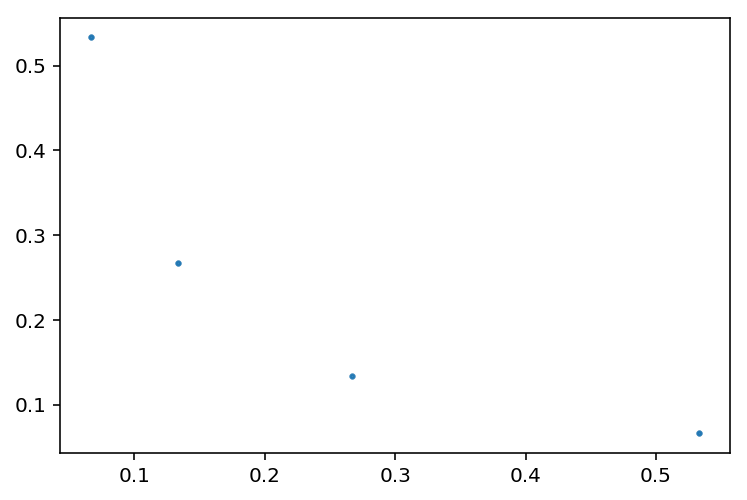

In [725]:
problem_5()

In [444]:
def generate_binary(n=100000):
    num = 0.0
    power = -1
    incr = 2
    while incr <= n:
        num += 2**power
        power -= incr
        incr += 1
    return num


# numerically check baker's map
def problem_6():
    traj = iterate_map(bakers_map, [generate_binary(), 0], 10**5)[5:]
    plt.plot(traj[:,0], traj[:,1], markersize=2, alpha=0.25)

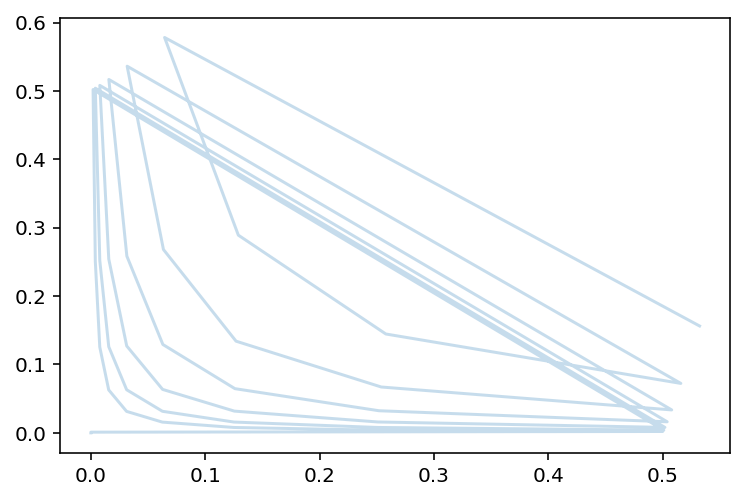

In [445]:
problem_6()

In [541]:
import functools

def make_ifs(fns, probabilities=[]):
    if not probabilities:
        probabilities = [1/len(fns)] * len(fns)
    thresholds = functools.reduce(lambda l, el: l + [l[-1] + el], probabilities, [0])[1:]
    
    def apply_ifs(x): # let x be a vector
        random = np.random.random()
        for i in range(len(thresholds)):
            if random < thresholds[i]:
                return fns[i](x)
        else:
            return fns[len(fns) - 1](x)
        
    return apply_ifs

def rotate(v, theta=np.pi/2):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ]) @ v

def scale(v, factor=1/3):
    return v * factor

def problem_9():
    ifs = make_ifs([
        lambda v: scale(v),
        lambda v: rotate(scale(v)) + np.array([1/3, 0]),
        lambda v: scale(v) + np.array([1/3, 1/3]),
        lambda v: rotate(scale(v), -np.pi/2) + np.array([2/3, 1/3]),
        lambda v: scale(v) + np.array([2/3, 0])
    ])
    
    traj = iterate_map(ifs, np.array([0.1, 0.1]), 10**4)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(traj[:, 0], traj[:, 1], 'o', markersize=1)

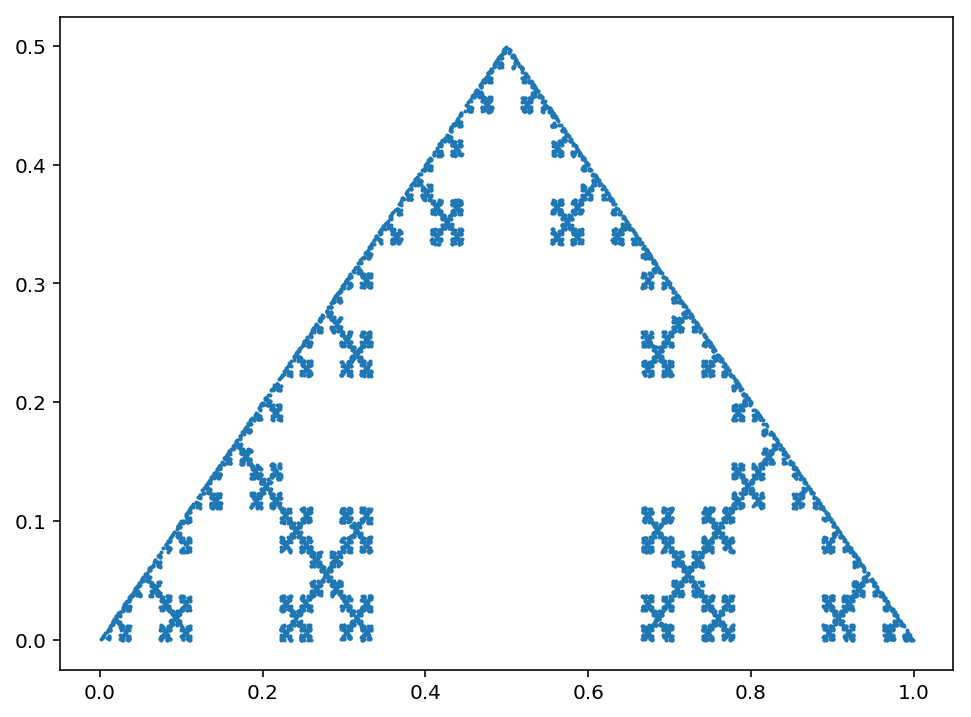

In [542]:
problem_9()

In [543]:
def get_plot(f, x_start, x_end, x_step=0.01):
    f_vec = np.vectorize(f)
    x = np.arange(x_start, x_end, x_step)
    y = f_vec(x)
    return np.column_stack((x, y))

def get_cobweb(trajectory):
    coords = np.column_stack((np.repeat(trajectory[:-1], 2), 
                              np.repeat(trajectory[1:], 2)))
    coords[::2] = np.column_stack((trajectory[:-1], trajectory[:-1]))
    return coords

In [598]:
def problem_10():
    def fn(x):
        if x >= 0:
            return 3 * np.abs(x - 0.5) - 3/2
        else:
            return 3/2 - 3 * np.abs(x + 0.5)
    
    plot = get_plot(fn, -2, 2, 0.001)
    line = get_plot(lambda x: x, -2, 2, 0.1)
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(plot[:,0], plot[:,1])
    ax.plot(line[:,0], line[:,1])
    
    traj = iterate_map(fn, -0.5, 10)
    cobweb = get_cobweb(traj)
    ax.plot(cobweb[:,0], cobweb[:,1])

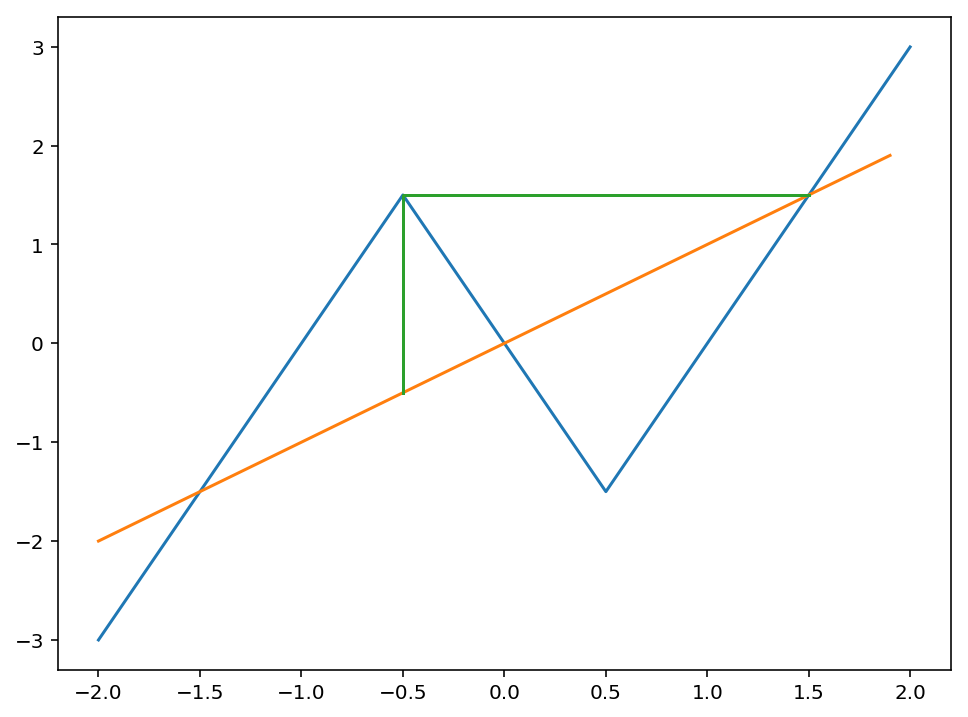

In [599]:
problem_10()

In [711]:
def problem_11():
    fn = lambda x: 3/2 - 3 * np.abs(x - 0.5)
    
    plot = get_plot(fn, 0, 1, 0.001)
    line = get_plot(lambda x: x, 0, 1, 0.01)
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(plot[:,0], plot[:,1])
    ax.plot(line[:,0], line[:,1])
    
    traj = iterate_map(fn, 2/3, 5)
    cobweb = get_cobweb(traj)
    ax.plot(cobweb[:,0], cobweb[:,1])

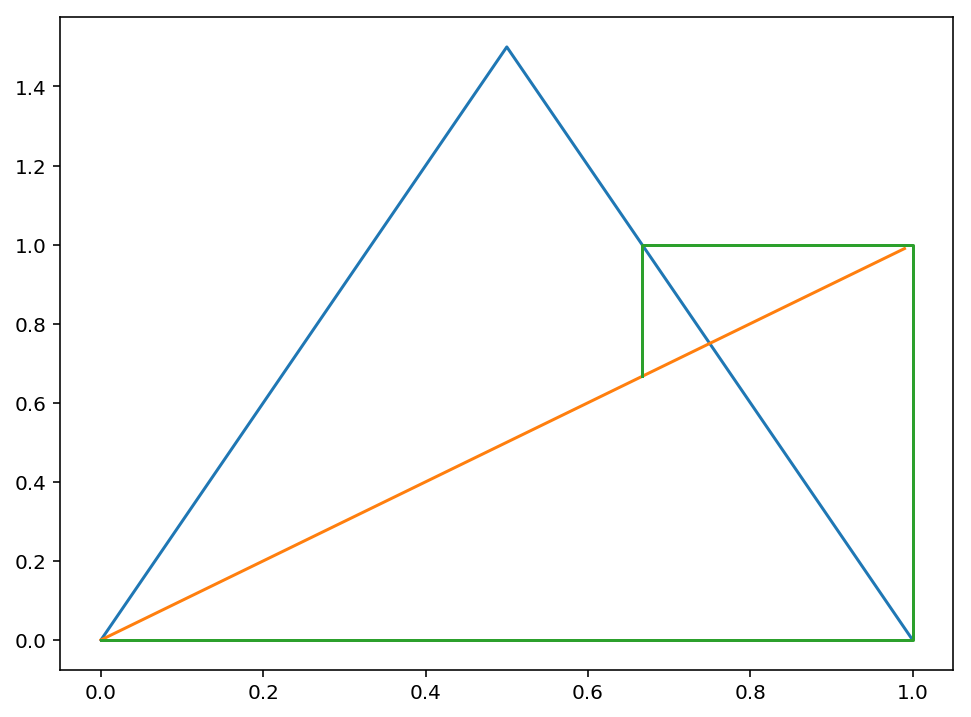

In [712]:
problem_11()